# 1. Exploratory Data Analysis (EDA)

An exploratory data analysis (EDA) shows how pneumonia looks in the wild, e.g. what other types of diseases it's commonly found with, how often it is found, what ages it affects, etc. 

Note that the NIH dataset used was not specifically acquired for pneumonia. So, while this is a representation of 'pneumonia in the wild,' the prevalence of pneumonia may be different if only chest x-rays that were acquired in an ER setting with suspicion of pneumonia were taken. 

In [2]:
# Importing packages

import numpy as np # linear algebra
import pandas as pd # data processing
import os
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import chain

Perform the following EDA:
* The patient demographic data such as gender, age, patient position,etc. (as it is available)
* The x-ray views taken (i.e. view position)
* The number of cases including: 
    * number of pneumonia cases
    * number of non-pneumonia cases
* The distribution of other diseases that are comorbid with pneumonia
* Number of disease per patient 
* Pixel-level assessments of the imaging data for healthy & disease states of interest (e.g. histograms of intensity values) and compare distributions across diseases

### 1.1 Metadata EDA 

In [3]:
## Load NIH data
all_xray_df = pd.read_csv('/data/Data_Entry_2017.csv')
all_xray_df_o = all_xray_df
all_xray_df.sample(3)

Image Index      Finding Labels  Follow-up #  Patient ID  \
101985  00027136_001.png  Pleural_Thickening            1       27136   
11381   00003002_002.png        Pneumothorax            2        3002   
87645   00021653_002.png          No Finding            2       21653   

        Patient Age Patient Gender View Position  OriginalImage[Width  \
101985           42              M            AP                 3056   
11381            34              M            AP                 3056   
87645            68              M            AP                 3056   

        Height]  OriginalImagePixelSpacing[x     y]  Unnamed: 11  
101985     2544                        0.139  0.139          NaN  
11381      2544                        0.139  0.139          NaN  
87645      2544                        0.139  0.139          NaN

In [4]:
## Load 'sample_labels.csv' data for pixel level assessments
sample_df = pd.read_csv('sample_labels.csv')
sample_df.sample(3)

Image Index                       Finding Labels  Follow-up #  \
2659  00013392_001.png                             Effusion            1   
4560  00022785_004.png                         Infiltration            4   
2672  00013505_002.png  Consolidation|Effusion|Infiltration            2   

      Patient ID Patient Age Patient Gender View Position  OriginalImageWidth  \
2659       13392        044Y              F            PA                2992   
4560       22785        030Y              M            PA                2992   
2672       13505        076Y              M            AP                2500   

      OriginalImageHeight  OriginalImagePixelSpacing_x  \
2659                 2991                        0.143   
4560                 2991                        0.143   
2672                 2048                        0.168   

      OriginalImagePixelSpacing_y  
2659                        0.143  
4560                        0.143  
2672                        0.168

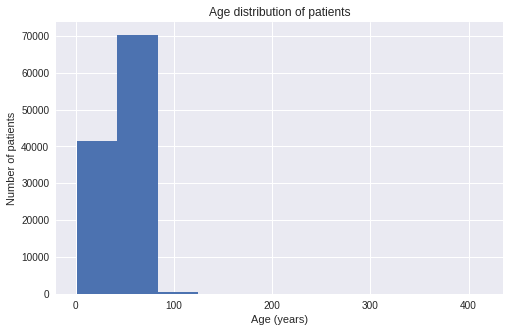

In [5]:
## Age distribution of patients
plt.style.use("seaborn")

fig, ax = plt.subplots(figsize=(8,5))
ax.hist(all_xray_df["Patient Age"]);
ax.set(title="Age distribution of patients",
      xlabel="Age (years)",
      ylabel="Number of patients");

In [6]:
# The histogram above shows a strange distribution, thus it is important to check potential outliers
age_outliers1 = len(all_xray_df[all_xray_df["Patient Age"] > 120])
age_outliers1

16

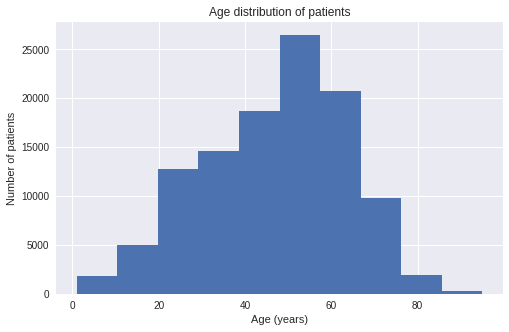

In [7]:
# Patients with age > 120 years old were misslabeled. Since there are only 16 patients and to avoid further problems,
# these patient's data will be removed from the array
all_xray_df = all_xray_df[all_xray_df["Patient Age"] < 120]

fig, ax = plt.subplots(figsize=(8,5))
ax.hist(all_xray_df["Patient Age"]);
ax.set(title="Age distribution of patients",
      xlabel="Age (years)",
      ylabel="Number of patients");

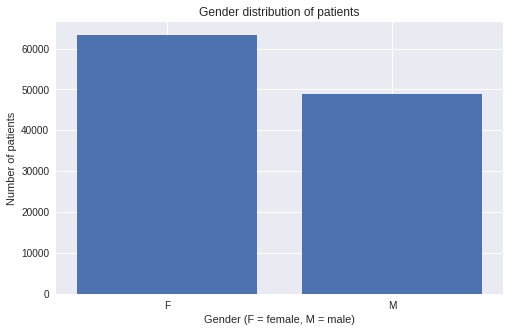

In [8]:
# Gender distribution

fig, ax = plt.subplots(figsize=(8,5))
ax.bar(np.unique(all_xray_df["Patient Gender"]), all_xray_df["Patient Gender"].value_counts());
ax.set(title="Gender distribution of patients",
      xlabel="Gender (F = female, M = male)",
      ylabel="Number of patients");

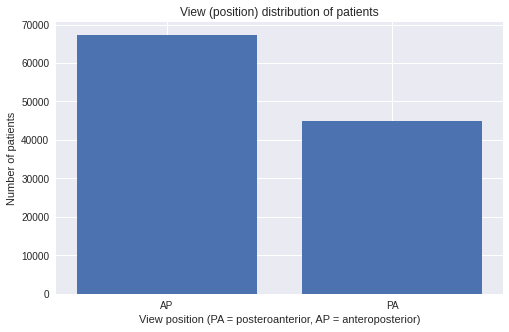

In [9]:
# The x-ray views taken (i.e. view position)

fig, ax = plt.subplots(figsize=(8,5))
ax.bar(np.unique(all_xray_df["View Position"]), all_xray_df["View Position"].value_counts());
ax.set(title="View (position) distribution of patients",
      xlabel="View position (PA = posteroanterior, AP = anteroposterior)",
      ylabel="Number of patients");

In [10]:
all_labels = np.unique(list(chain(*all_xray_df['Finding Labels'].map(lambda x: x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x)>0]
print('All Labels ({}): {}'.format(len(all_labels), all_labels))
for c_label in all_labels:
    if len(c_label)>1: # leave out empty labels
        all_xray_df[c_label] = all_xray_df['Finding Labels'].map(lambda finding: 1.0 if c_label in finding else 0)
all_xray_df.sample(3)

All Labels (15): ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Image Index         Finding Labels  Follow-up #  Patient ID  \
23734  00006271_065.png           Infiltration           65        6271   
20237  00005403_014.png  Effusion|Infiltration           14        5403   
91937  00022935_002.png             No Finding            2       22935   

       Patient Age Patient Gender View Position  OriginalImage[Width  Height]  \
23734           40              M            AP                 2500     2048   
20237           35              F            AP                 2500     2048   
91937           65              F            AP                 3056     2544   

       OriginalImagePixelSpacing[x  ...  Emphysema  Fibrosis  Hernia  \
23734                        0.171  ...        0.0       0.0     0.0   
20237                        0.171  ...        0.0       0.0     0.0   
91937                        0.139  ...        0.0       0.0     0.0   

       Infiltration  Mass  No Finding  Nodule  Pleural_Thickening  Pneumonia  \
23734           1.0   0.0         0.0     0.0                 0.0        0.0   
20237           1.0   0.0         0.0     0.0                 0.0        0.0   
91937           0.0   0.0         1.0     0.0                 0.0        0.0   

       Pneumothorax  
23734           0.0  
20237           0.0  
91937           0.0  

[3 rows x 27 columns]

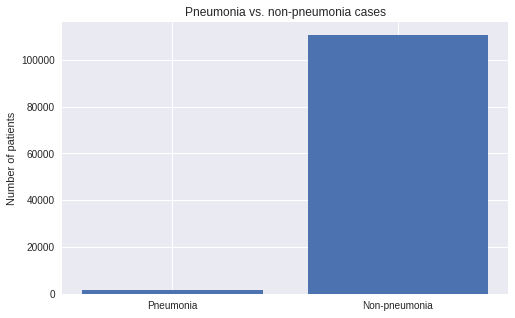

In [11]:
# Pneumonia vs. non-pneumonia cases

fig, ax = plt.subplots(figsize=(8,5))
ax.bar(["Pneumonia", "Non-pneumonia"], ((all_xray_df["Pneumonia"]==1).sum(), (all_xray_df["Pneumonia"]==0).sum()));
ax.set(title="Pneumonia vs. non-pneumonia cases",
      ylabel="Number of patients");

In [12]:
# Distribution of pneumonia (1.2%) vs. non pneumonia (98%) cases
(all_xray_df["Pneumonia"]==1).sum()/len(all_xray_df), (all_xray_df["Pneumonia"]==0).sum()/len(all_xray_df)

(0.012756012274316705, 0.9872439877256833)

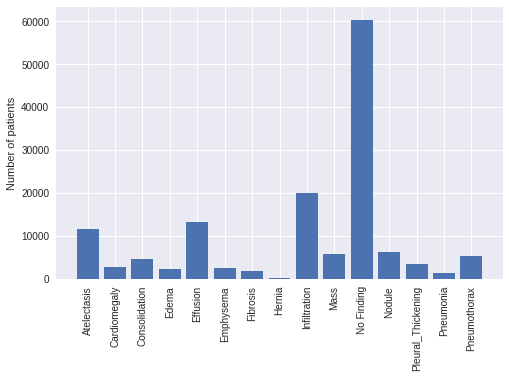

In [13]:
# Finding labels: No findings, pneumonia and other diseases
fig, ax = plt.subplots(figsize=(8,5))
ax.bar(all_labels, all_xray_df[all_labels].sum())
plt.xticks(rotation=90)
ax.set(ylabel="Number of patients");

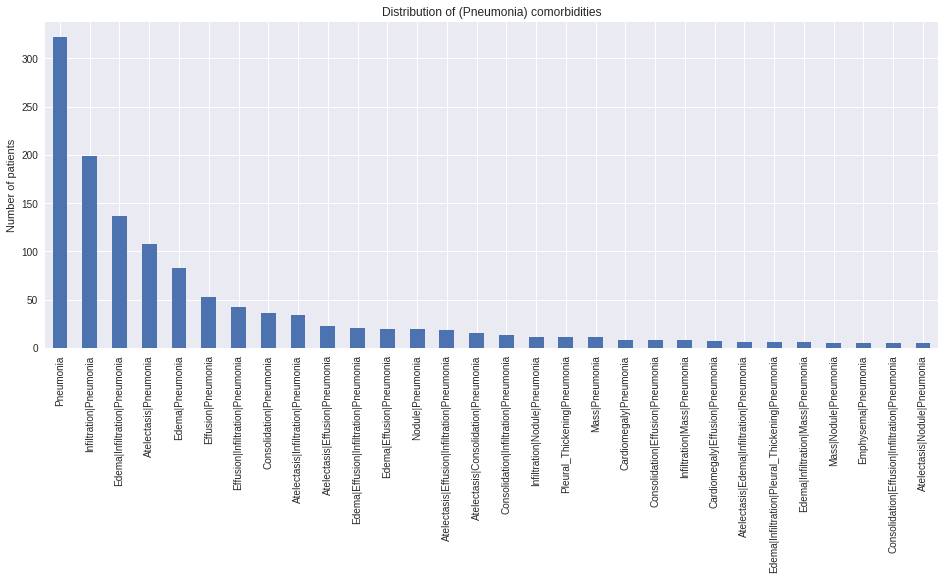

In [14]:
# Distribution of (Pneumonia) comorbidities 

fig, ax = plt.subplots(figsize=(16, 6))
all_xray_df[all_xray_df.Pneumonia == 1]["Finding Labels"].value_counts()[:30].plot(kind="bar");
ax.set(title="Distribution of (Pneumonia) comorbidities",
      ylabel = "Number of patients");

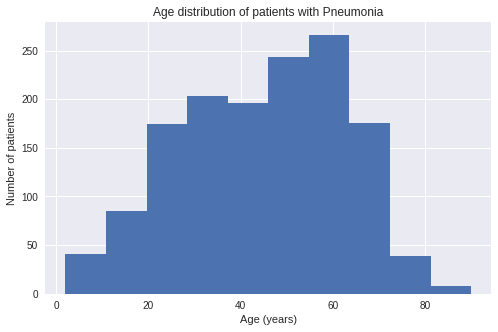

In [15]:
# Age distribution of patients with Pneumonia

fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(all_xray_df[all_xray_df.Pneumonia == 1]["Patient Age"]);
ax.set(title="Age distribution of patients with Pneumonia",
       xlabel="Age (years)",
       ylabel="Number of patients");

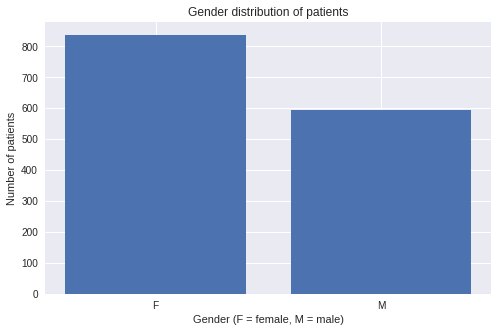

In [16]:
# Gender distribution of patients with Pneumonia

fig, ax = plt.subplots(figsize=(8,5))
ax.bar(np.unique(all_xray_df[all_xray_df.Pneumonia == 1]["Patient Gender"]), all_xray_df[all_xray_df.Pneumonia == 1]["Patient Gender"].value_counts());
ax.set(title="Gender distribution of patients",
      xlabel="Gender (F = female, M = male)",
      ylabel="Number of patients");

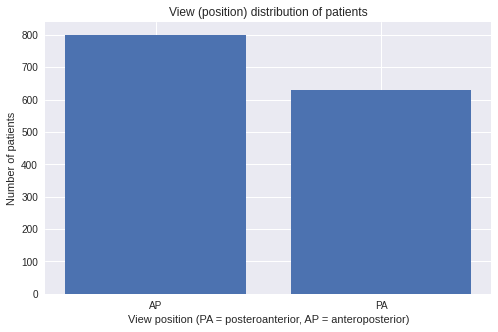

In [17]:
# The x-ray views taken (i.e. view position) in pneumonia patients

fig, ax = plt.subplots(figsize=(8,5))
ax.bar(np.unique(all_xray_df[all_xray_df.Pneumonia == 1]["View Position"]), all_xray_df[all_xray_df.Pneumonia == 1]["View Position"].value_counts());
ax.set(title="View (position) distribution of patients",
      xlabel="View position (PA = posteroanterior, AP = anteroposterior)",
      ylabel="Number of patients");

### 1.2 Pixel-level EDA

In [18]:
len(sample_df)

5606

In [19]:
sample_df.head()

Image Index                                     Finding Labels  \
0  00000013_005.png  Emphysema|Infiltration|Pleural_Thickening|Pneu...   
1  00000013_026.png                             Cardiomegaly|Emphysema   
2  00000017_001.png                                         No Finding   
3  00000030_001.png                                        Atelectasis   
4  00000032_001.png                        Cardiomegaly|Edema|Effusion   

   Follow-up #  Patient ID Patient Age Patient Gender View Position  \
0            5          13        060Y              M            AP   
1           26          13        057Y              M            AP   
2            1          17        077Y              M            AP   
3            1          30        079Y              M            PA   
4            1          32        055Y              F            AP   

   OriginalImageWidth  OriginalImageHeight  OriginalImagePixelSpacing_x  \
0                3056                 2544                        0.139   
1                2500                 2048                        0.168   
2                2500                 2048                        0.168   
3                2992                 2991                        0.143   
4                2500                 2048                        0.168   

   OriginalImagePixelSpacing_y  
0                        0.139  
1                        0.168  
2                        0.168  
3                        0.143  
4                        0.168

In [20]:
all_xray_df.head()

Image Index          Finding Labels  Follow-up #  Patient ID  \
0  00000001_000.png            Cardiomegaly            0           1   
1  00000001_001.png  Cardiomegaly|Emphysema            1           1   
2  00000001_002.png   Cardiomegaly|Effusion            2           1   
3  00000002_000.png              No Finding            0           2   
4  00000003_000.png                  Hernia            0           3   

   Patient Age Patient Gender View Position  OriginalImage[Width  Height]  \
0           58              M            PA                 2682     2749   
1           58              M            PA                 2894     2729   
2           58              M            PA                 2500     2048   
3           81              M            PA                 2500     2048   
4           81              F            PA                 2582     2991   

   OriginalImagePixelSpacing[x  ...  Emphysema  Fibrosis  Hernia  \
0                        0.143  ...        0.0       0.0     0.0   
1                        0.143  ...        1.0       0.0     0.0   
2                        0.168  ...        0.0       0.0     0.0   
3                        0.171  ...        0.0       0.0     0.0   
4                        0.143  ...        0.0       0.0     1.0   

   Infiltration  Mass  No Finding  Nodule  Pleural_Thickening  Pneumonia  \
0           0.0   0.0         0.0     0.0                 0.0        0.0   
1           0.0   0.0         0.0     0.0                 0.0        0.0   
2           0.0   0.0         0.0     0.0                 0.0        0.0   
3           0.0   0.0         1.0     0.0                 0.0        0.0   
4           0.0   0.0         0.0     0.0                 0.0        0.0   

   Pneumothorax  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  

[5 rows x 27 columns]

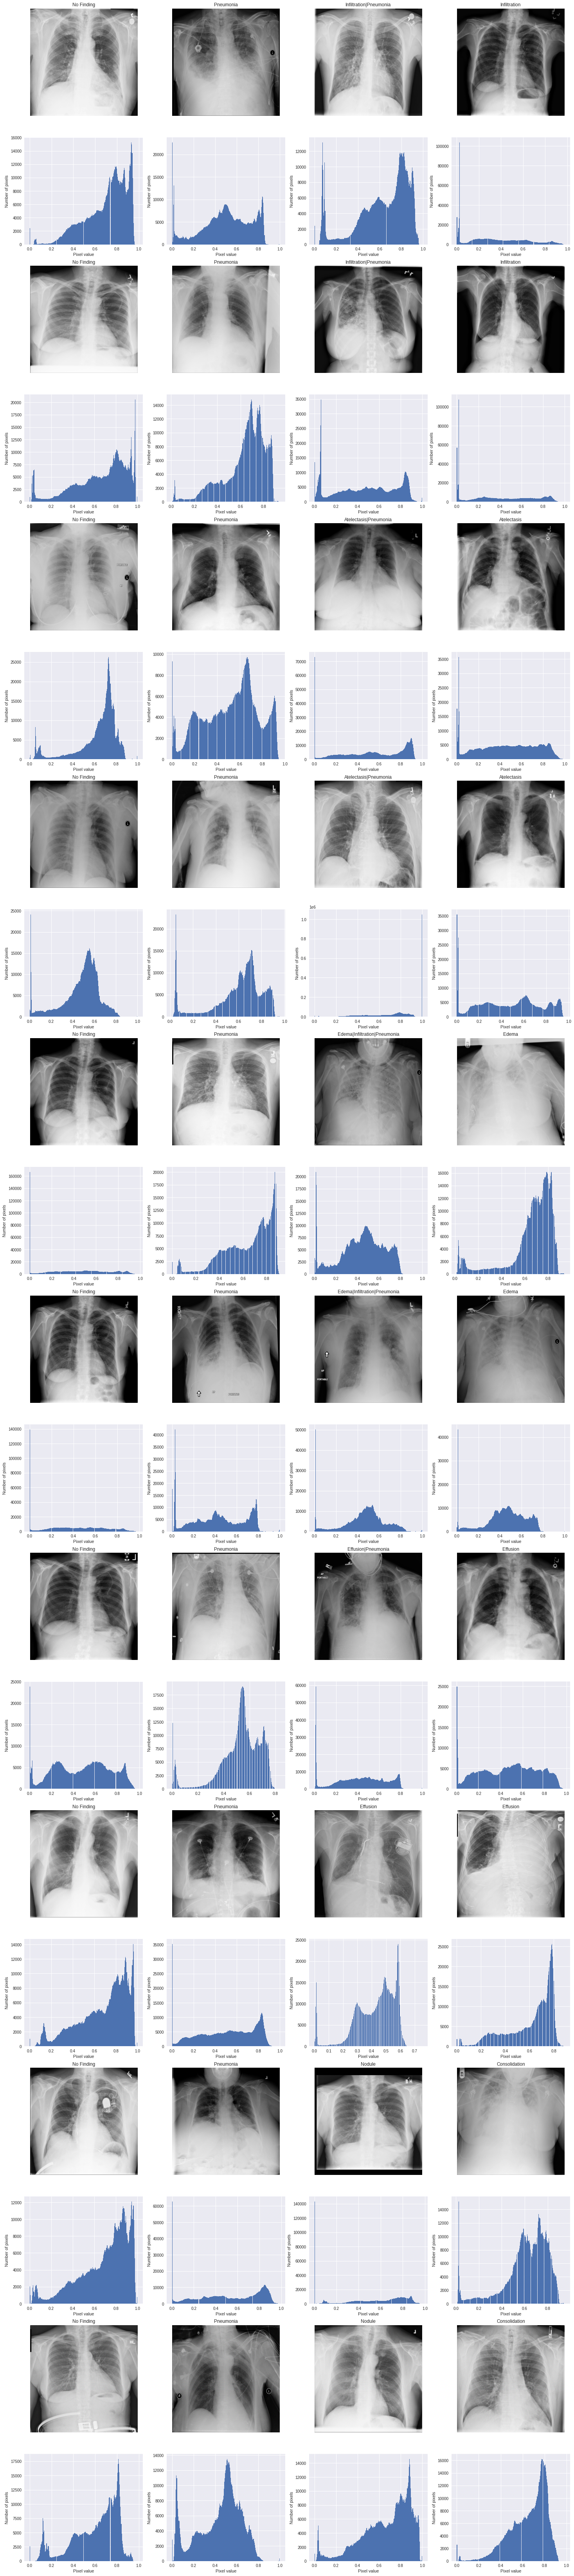

In [24]:
# The file sample_df contains Image Index values that do not appear in the database, showing an error when those files are plotted,
# thus the original database is selected instead

fig, ((ax0, ax1, ax2, ax3), (ax4, ax5, ax6, ax7),
      (ax8, ax9, ax10, ax11), (ax12, ax13, ax14, ax15),
      (ax16, ax17, ax18, ax19), (ax20, ax21, ax22, ax23),
      (ax24, ax25, ax26, ax27), (ax28, ax29, ax30, ax31),
      (ax32, ax33, ax34, ax35), (ax36, ax37, ax38, ax39),
      (ax40, ax41, ax42, ax43), (ax44, ax45, ax46, ax47),
      (ax48, ax49, ax50, ax51), (ax52, ax53, ax54, ax55),
      (ax56, ax57, ax58, ax59), (ax60, ax61, ax62, ax63),
      (ax64, ax65, ax66, ax67), (ax68, ax69, ax70, ax71),
      (ax72, ax73, ax74, ax75), (ax76, ax77, ax78, ax79)) = plt.subplots(nrows=20,
                                                                         ncols=4,
                                                                         figsize=(25, 120))
     



# Infiltration
img0 = plt.imread("/data/images_001/images/{}".format(all_xray_df_o["Image Index"][all_xray_df_o[all_xray_df_o["Finding Labels"] == "No Finding"].index[0]]))
img1 = plt.imread("/data/images_001/images/{}".format(all_xray_df_o["Image Index"][all_xray_df_o[all_xray_df_o["Finding Labels"] == "Pneumonia"].index[0]]))
img2 = plt.imread("/data/images_001/images/{}".format(all_xray_df_o["Image Index"][all_xray_df_o[all_xray_df_o["Finding Labels"] == "Infiltration|Pneumonia"].index[0]]))
img3 = plt.imread("/data/images_001/images/{}".format(all_xray_df_o["Image Index"][all_xray_df_o[all_xray_df_o["Finding Labels"] == "Infiltration"].index[0]]))

img8 = plt.imread("/data/images_001/images/{}".format(all_xray_df_o["Image Index"][all_xray_df_o[all_xray_df_o["Finding Labels"] == "No Finding"].index[1]]))
img9 = plt.imread("/data/images_001/images/{}".format(all_xray_df_o["Image Index"][all_xray_df_o[all_xray_df_o["Finding Labels"] == "Pneumonia"].index[1]]))
img10 = plt.imread("/data/images_001/images/{}".format(all_xray_df_o["Image Index"][all_xray_df_o[all_xray_df_o["Finding Labels"] == "Infiltration|Pneumonia"].index[1]]))
img11 = plt.imread("/data/images_001/images/{}".format(all_xray_df_o["Image Index"][all_xray_df_o[all_xray_df_o["Finding Labels"] == "Infiltration"].index[1]]))

# Atelectasis
img16 = plt.imread("/data/images_001/images/{}".format(all_xray_df_o["Image Index"][all_xray_df_o[all_xray_df_o["Finding Labels"] == "No Finding"].index[2]]))
img17 = plt.imread("/data/images_001/images/{}".format(all_xray_df_o["Image Index"][all_xray_df_o[all_xray_df_o["Finding Labels"] == "Pneumonia"].index[2]]))
img18 = plt.imread("/data/images_001/images/{}".format(all_xray_df_o["Image Index"][all_xray_df_o[all_xray_df_o["Finding Labels"] == "Atelectasis|Pneumonia"].index[0]]))
img19 = plt.imread("/data/images_001/images/{}".format(all_xray_df_o["Image Index"][all_xray_df_o[all_xray_df_o["Finding Labels"] == "Atelectasis"].index[0]]))

img24 = plt.imread("/data/images_001/images/{}".format(all_xray_df_o["Image Index"][all_xray_df_o[all_xray_df_o["Finding Labels"] == "No Finding"].index[3]]))
img25 = plt.imread("/data/images_001/images/{}".format(all_xray_df_o["Image Index"][all_xray_df_o[all_xray_df_o["Finding Labels"] == "Pneumonia"].index[3]]))
img26 = plt.imread("/data/images_001/images/{}".format(all_xray_df_o["Image Index"][all_xray_df_o[all_xray_df_o["Finding Labels"] == "Atelectasis|Pneumonia"].index[1]]))
img27 = plt.imread("/data/images_001/images/{}".format(all_xray_df_o["Image Index"][all_xray_df_o[all_xray_df_o["Finding Labels"] == "Atelectasis"].index[1]]))


# Edema
img32 = plt.imread("/data/images_001/images/{}".format(all_xray_df_o["Image Index"][all_xray_df_o[all_xray_df_o["Finding Labels"] == "No Finding"].index[4]]))
img33 = plt.imread("/data/images_001/images/{}".format(all_xray_df_o["Image Index"][all_xray_df_o[all_xray_df_o["Finding Labels"] == "Pneumonia"].index[4]]))
img34 = plt.imread("/data/images_001/images/{}".format(all_xray_df_o["Image Index"][all_xray_df_o[all_xray_df_o["Finding Labels"] == "Edema|Infiltration|Pneumonia"].index[0]]))
img35 = plt.imread("/data/images_001/images/{}".format(all_xray_df_o["Image Index"][all_xray_df_o[all_xray_df_o["Finding Labels"] == "Edema"].index[0]]))

img40 = plt.imread("/data/images_001/images/{}".format(all_xray_df_o["Image Index"][all_xray_df_o[all_xray_df_o["Finding Labels"] == "No Finding"].index[5]]))
img41 = plt.imread("/data/images_001/images/{}".format(all_xray_df_o["Image Index"][all_xray_df_o[all_xray_df_o["Finding Labels"] == "Pneumonia"].index[5]]))
img42 = plt.imread("/data/images_001/images/{}".format(all_xray_df_o["Image Index"][all_xray_df_o[all_xray_df_o["Finding Labels"] == "Edema|Infiltration|Pneumonia"].index[1]]))
img43 = plt.imread("/data/images_001/images/{}".format(all_xray_df_o["Image Index"][all_xray_df_o[all_xray_df_o["Finding Labels"] == "Edema"].index[1]]))


# Effusion
img48 = plt.imread("/data/images_001/images/{}".format(all_xray_df_o["Image Index"][all_xray_df_o[all_xray_df_o["Finding Labels"] == "No Finding"].index[6]]))
img49 = plt.imread("/data/images_001/images/{}".format(all_xray_df_o["Image Index"][all_xray_df_o[all_xray_df_o["Finding Labels"] == "Pneumonia"].index[6]]))
img50 = plt.imread("/data/images_001/images/{}".format(all_xray_df_o["Image Index"][all_xray_df_o[all_xray_df_o["Finding Labels"] == "Effusion|Pneumonia"].index[0]]))
img51 = plt.imread("/data/images_001/images/{}".format(all_xray_df_o["Image Index"][all_xray_df_o[all_xray_df_o["Finding Labels"] == "Effusion"].index[0]]))

img56 = plt.imread("/data/images_001/images/{}".format(all_xray_df_o["Image Index"][all_xray_df_o[all_xray_df_o["Finding Labels"] == "No Finding"].index[7]]))
img57 = plt.imread("/data/images_001/images/{}".format(all_xray_df_o["Image Index"][all_xray_df_o[all_xray_df_o["Finding Labels"] == "Pneumonia"].index[7]]))
img58 = plt.imread("/data/images_001/images/{}".format(all_xray_df_o["Image Index"][all_xray_df_o[all_xray_df_o["Finding Labels"] == "Effusion"].index[1]]))
img59 = plt.imread("/data/images_001/images/{}".format(all_xray_df_o["Image Index"][all_xray_df_o[all_xray_df_o["Finding Labels"] == "Effusion"].index[2]]))


# Consolidation & Nodule
img64 = plt.imread("/data/images_001/images/{}".format(all_xray_df_o["Image Index"][all_xray_df_o[all_xray_df_o["Finding Labels"] == "No Finding"].index[8]]))
img65 = plt.imread("/data/images_001/images/{}".format(all_xray_df_o["Image Index"][all_xray_df_o[all_xray_df_o["Finding Labels"] == "Pneumonia"].index[8]]))
img66 = plt.imread("/data/images_001/images/{}".format(all_xray_df_o["Image Index"][all_xray_df_o[all_xray_df_o["Finding Labels"] == "Nodule"].index[0]]))
img67 = plt.imread("/data/images_001/images/{}".format(all_xray_df_o["Image Index"][all_xray_df_o[all_xray_df_o["Finding Labels"] == "Consolidation"].index[0]]))

img72 = plt.imread("/data/images_001/images/{}".format(all_xray_df_o["Image Index"][all_xray_df_o[all_xray_df_o["Finding Labels"] == "No Finding"].index[9]]))
img73 = plt.imread("/data/images_001/images/{}".format(all_xray_df_o["Image Index"][all_xray_df_o[all_xray_df_o["Finding Labels"] == "Pneumonia"].index[9]]))
img74 = plt.imread("/data/images_001/images/{}".format(all_xray_df_o["Image Index"][all_xray_df_o[all_xray_df_o["Finding Labels"] == "Nodule"].index[1]]))
img75 = plt.imread("/data/images_001/images/{}".format(all_xray_df_o["Image Index"][all_xray_df_o[all_xray_df_o["Finding Labels"] == "Consolidation"].index[1]]))


# Infiltration
ax0.imshow(img0, cmap="gray")
ax1.imshow(img1, cmap="gray")
ax2.imshow(img2, cmap="gray")
ax3.imshow(img3, cmap="gray")
ax0.axis("Off")
ax1.axis("Off")
ax2.axis("Off")
ax3.axis("Off")
ax4.hist(img0.ravel(),bins=256)
ax5.hist(img1.ravel(),bins=256)
ax6.hist(img2.ravel(),bins=256)
ax7.hist(img3.ravel(),bins=256)
ax0.set(title="No Finding")
ax1.set(title="Pneumonia")
ax2.set(title="Infiltration|Pneumonia")
ax3.set(title="Infiltration")
ax4.set(xlabel="Pixel value",
        ylabel="Number of pixels")
ax5.set(xlabel="Pixel value",
        ylabel="Number of pixels")
ax6.set(xlabel="Pixel value",
        ylabel="Number of pixels")
ax7.set(xlabel="Pixel value",
        ylabel="Number of pixels");

ax8.imshow(img8, cmap="gray")
ax9.imshow(img9, cmap="gray")
ax10.imshow(img10, cmap="gray")
ax11.imshow(img11, cmap="gray")
ax8.axis("Off")
ax9.axis("Off")
ax10.axis("Off")
ax11.axis("Off")
ax12.hist(img8.ravel(),bins=256)
ax13.hist(img9.ravel(),bins=256)
ax14.hist(img10.ravel(),bins=256)
ax15.hist(img11.ravel(),bins=256)
ax8.set(title="No Finding")
ax9.set(title="Pneumonia")
ax10.set(title="Infiltration|Pneumonia")
ax11.set(title="Infiltration")
ax12.set(xlabel="Pixel value",
        ylabel="Number of pixels")
ax13.set(xlabel="Pixel value",
        ylabel="Number of pixels")
ax14.set(xlabel="Pixel value",
        ylabel="Number of pixels")
ax15.set(xlabel="Pixel value",
        ylabel="Number of pixels");

# Atelectasis
ax16.imshow(img16, cmap="gray")
ax17.imshow(img17, cmap="gray")
ax18.imshow(img18, cmap="gray")
ax19.imshow(img19, cmap="gray")
ax16.axis("Off")
ax17.axis("Off")
ax18.axis("Off")
ax19.axis("Off")
ax20.hist(img16.ravel(),bins=256)
ax21.hist(img17.ravel(),bins=256)
ax22.hist(img18.ravel(),bins=256)
ax23.hist(img19.ravel(),bins=256)
ax16.set(title="No Finding")
ax17.set(title="Pneumonia")
ax18.set(title="Atelectasis|Pneumonia")
ax19.set(title="Atelectasis")
ax20.set(xlabel="Pixel value",
        ylabel="Number of pixels")
ax21.set(xlabel="Pixel value",
        ylabel="Number of pixels")
ax22.set(xlabel="Pixel value",
        ylabel="Number of pixels")
ax23.set(xlabel="Pixel value",
        ylabel="Number of pixels");


ax24.imshow(img24, cmap="gray")
ax25.imshow(img25, cmap="gray")
ax26.imshow(img26, cmap="gray")
ax27.imshow(img27, cmap="gray")
ax24.axis("Off")
ax25.axis("Off")
ax26.axis("Off")
ax27.axis("Off")
ax28.hist(img24.ravel(),bins=256)
ax29.hist(img25.ravel(),bins=256)
ax30.hist(img26.ravel(),bins=256)
ax31.hist(img27.ravel(),bins=256)
ax24.set(title="No Finding")
ax25.set(title="Pneumonia")
ax26.set(title="Atelectasis|Pneumonia")
ax27.set(title="Atelectasis")
ax28.set(xlabel="Pixel value",
        ylabel="Number of pixels")
ax29.set(xlabel="Pixel value",
        ylabel="Number of pixels")
ax30.set(xlabel="Pixel value",
        ylabel="Number of pixels")
ax31.set(xlabel="Pixel value",
        ylabel="Number of pixels");


# Edema
ax32.imshow(img32, cmap="gray")
ax33.imshow(img33, cmap="gray")
ax34.imshow(img34, cmap="gray")
ax35.imshow(img35, cmap="gray")
ax32.axis("Off")
ax33.axis("Off")
ax34.axis("Off")
ax35.axis("Off")
ax36.hist(img32.ravel(),bins=256)
ax37.hist(img33.ravel(),bins=256)
ax38.hist(img34.ravel(),bins=256)
ax39.hist(img35.ravel(),bins=256)
ax32.set(title="No Finding")
ax33.set(title="Pneumonia")
ax34.set(title="Edema|Infiltration|Pneumonia")
ax35.set(title="Edema")
ax36.set(xlabel="Pixel value",
        ylabel="Number of pixels")
ax37.set(xlabel="Pixel value",
        ylabel="Number of pixels")
ax38.set(xlabel="Pixel value",
        ylabel="Number of pixels")
ax39.set(xlabel="Pixel value",
        ylabel="Number of pixels");


ax40.imshow(img40, cmap="gray")
ax41.imshow(img41, cmap="gray")
ax42.imshow(img42, cmap="gray")
ax43.imshow(img43, cmap="gray")
ax40.axis("Off")
ax41.axis("Off")
ax42.axis("Off")
ax43.axis("Off")
ax44.hist(img40.ravel(),bins=256)
ax45.hist(img41.ravel(),bins=256)
ax46.hist(img42.ravel(),bins=256)
ax47.hist(img43.ravel(),bins=256)
ax40.set(title="No Finding")
ax41.set(title="Pneumonia")
ax42.set(title="Edema|Infiltration|Pneumonia")
ax43.set(title="Edema")
ax44.set(xlabel="Pixel value",
        ylabel="Number of pixels")
ax45.set(xlabel="Pixel value",
        ylabel="Number of pixels")
ax46.set(xlabel="Pixel value",
        ylabel="Number of pixels")
ax47.set(xlabel="Pixel value",
        ylabel="Number of pixels");


# Effusion
ax48.imshow(img48, cmap="gray")
ax49.imshow(img49, cmap="gray")
ax50.imshow(img50, cmap="gray")
ax51.imshow(img51, cmap="gray")
ax48.axis("Off")
ax49.axis("Off")
ax50.axis("Off")
ax51.axis("Off")
ax52.hist(img48.ravel(),bins=256)
ax53.hist(img49.ravel(),bins=256)
ax54.hist(img50.ravel(),bins=256)
ax55.hist(img51.ravel(),bins=256)
ax48.set(title="No Finding")
ax49.set(title="Pneumonia")
ax50.set(title="Effusion|Pneumonia")
ax51.set(title="Effusion")
ax52.set(xlabel="Pixel value",
        ylabel="Number of pixels")
ax53.set(xlabel="Pixel value",
        ylabel="Number of pixels")
ax54.set(xlabel="Pixel value",
        ylabel="Number of pixels")
ax55.set(xlabel="Pixel value",
        ylabel="Number of pixels");



ax56.imshow(img56, cmap="gray")
ax57.imshow(img57, cmap="gray")
ax58.imshow(img58, cmap="gray")
ax59.imshow(img59, cmap="gray")
ax56.axis("Off")
ax57.axis("Off")
ax58.axis("Off")
ax59.axis("Off")
ax60.hist(img56.ravel(),bins=256)
ax61.hist(img57.ravel(),bins=256)
ax62.hist(img58.ravel(),bins=256)
ax63.hist(img59.ravel(),bins=256)
ax56.set(title="No Finding")
ax57.set(title="Pneumonia")
ax58.set(title="Effusion")
ax59.set(title="Effusion")
ax60.set(xlabel="Pixel value",
        ylabel="Number of pixels")
ax61.set(xlabel="Pixel value",
        ylabel="Number of pixels")
ax62.set(xlabel="Pixel value",
        ylabel="Number of pixels")
ax63.set(xlabel="Pixel value",
        ylabel="Number of pixels");



# Consolidation & Nodule
ax64.imshow(img64, cmap="gray")
ax65.imshow(img65, cmap="gray")
ax66.imshow(img66, cmap="gray")
ax67.imshow(img67, cmap="gray")
ax64.axis("Off")
ax65.axis("Off")
ax66.axis("Off")
ax67.axis("Off")
ax68.hist(img64.ravel(),bins=256)
ax69.hist(img65.ravel(),bins=256)
ax70.hist(img66.ravel(),bins=256)
ax71.hist(img67.ravel(),bins=256)
ax64.set(title="No Finding")
ax65.set(title="Pneumonia")
ax66.set(title="Nodule")
ax67.set(title="Consolidation")
ax68.set(xlabel="Pixel value",
        ylabel="Number of pixels")
ax69.set(xlabel="Pixel value",
        ylabel="Number of pixels")
ax70.set(xlabel="Pixel value",
        ylabel="Number of pixels")
ax71.set(xlabel="Pixel value",
        ylabel="Number of pixels");

ax72.imshow(img72, cmap="gray")
ax73.imshow(img73, cmap="gray")
ax74.imshow(img74, cmap="gray")
ax75.imshow(img75, cmap="gray")
ax72.axis("Off")
ax73.axis("Off")
ax74.axis("Off")
ax75.axis("Off")
ax76.hist(img72.ravel(),bins=256)
ax77.hist(img73.ravel(),bins=256)
ax78.hist(img74.ravel(),bins=256)
ax79.hist(img75.ravel(),bins=256)
ax72.set(title="No Finding")
ax73.set(title="Pneumonia")
ax74.set(title="Nodule")
ax75.set(title="Consolidation")
ax76.set(xlabel="Pixel value",
        ylabel="Number of pixels")
ax77.set(xlabel="Pixel value",
        ylabel="Number of pixels")
ax78.set(xlabel="Pixel value",
        ylabel="Number of pixels")
ax79.set(xlabel="Pixel value",
        ylabel="Number of pixels");

### General conclusions:
1. Distribution of cases is unbalanced for pneumonia, thus training cases will be reduced
2. Important comorbidities of pneumonia are infiltration, edema, atelectasis and effusion. Performance could be impacted by the inclusion of these comorbidities (similar histograms) even if these comorbidities may as well be good indicators of pneumonia. Expert advice in this regard is needed.
3. Age, gender and view position distributions show real trends